In [3]:
%matplotlib notebook

In [4]:
import pandas as pd
import numpy as np
import ancil_load
import datetime as dt
ancil_load = reload(ancil_load)

In [5]:
df_all_ancil,price = ancil_load.SA_production_price()
df_all_ancil["index"]=df_all_ancil.index
df_all_ancil=df_all_ancil.drop_duplicates("index")
df_all_ancil=df_all_ancil.drop("index",axis=1)
df_all_ancil=df_all_ancil.fillna(0)

price=pd.DataFrame(price)
price["index"]=price.index
price=price.drop_duplicates("index")
price=price.drop("index",axis=1)
price=pd.Series(price)

df=df_all_ancil.loc[dt.datetime(2017,1,1):dt.datetime(2018,1,1)]

In [6]:
# Center the data by subtracting the mean on time axis
df=df-df.mean(axis=0)

# PCA matrix size m*m

<IPython.core.display.Javascript object>


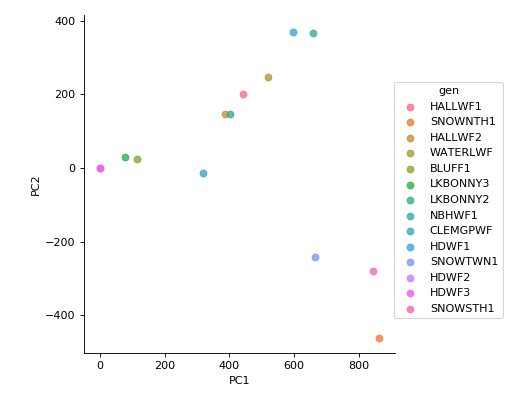

<IPython.core.display.Javascript object>


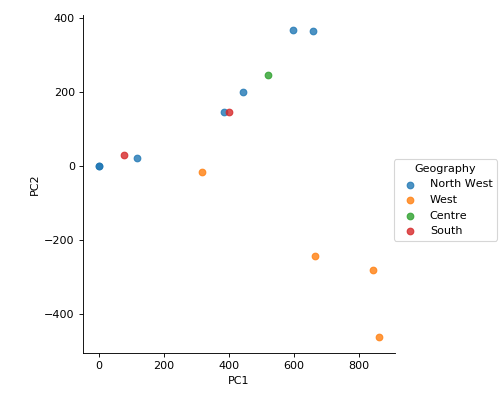

<IPython.core.display.Javascript object>


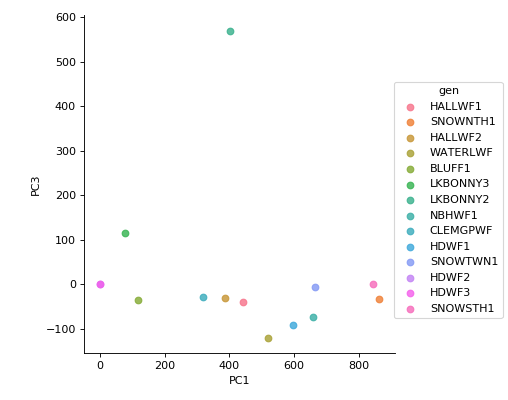

<IPython.core.display.Javascript object>


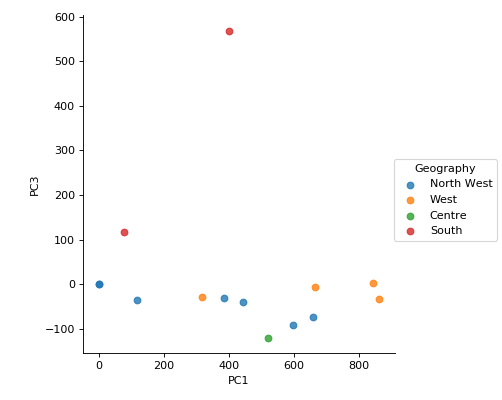

<IPython.core.display.Javascript object>


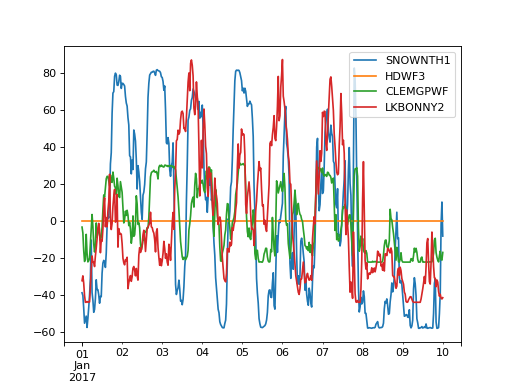

In [17]:
# U is the eigenvectors we care about
u,s,v=np.linalg.svd(df)

PC1=u[:,0]
PC2=u[:,1]
PC3=u[:,2]

C1=np.dot(PC1,df)
C2=np.dot(PC2,df)
C3=np.dot(PC3,df)



PCA=pd.DataFrame({"PC1":C1,"PC2":C2,"PC3":C3},index=df.columns)
PCA["gen"]=PCA.index
PCA["Geography"]=np.array(["North West","West","North West","Centre","North West","South","South","North West","West","North West","West","North West","North West","West"])

import seaborn as sns

# PCA1 Vs PC2
sns.lmplot(data=PCA,x="PC1",y="PC2",hue="gen",fit_reg=False)
sns.lmplot(data=PCA,x="PC1",y="PC2",hue="Geography",fit_reg=False)

# PCA1 VC PC3
sns.lmplot(data=PCA,x="PC1",y="PC3",hue="gen",fit_reg=False)
sns.lmplot(data=PCA,x="PC1",y="PC3",hue="Geography",fit_reg=False)

# Looking at timeseries underneath
df[["SNOWNTH1","HDWF3","CLEMGPWF","LKBONNY2"]].plot()

# PCA matrix size nxn

In [17]:
df.shape

(16033, 14)

In [9]:
17521*14

245294

In [ ]:
MIllion

In [15]:
df=df_all_ancil.loc[dt.datetime(2017,1,1):dt.datetime(2017,12,1)]
df=df-df.mean(axis=0)

In [16]:
u,s,v=np.linalg.svd(df)

PC1=v[:,0]
PC2=v[:,1]
PC3=v[:,2]

In [40]:
df.shape

(16033, 14)

<IPython.core.display.Javascript object>


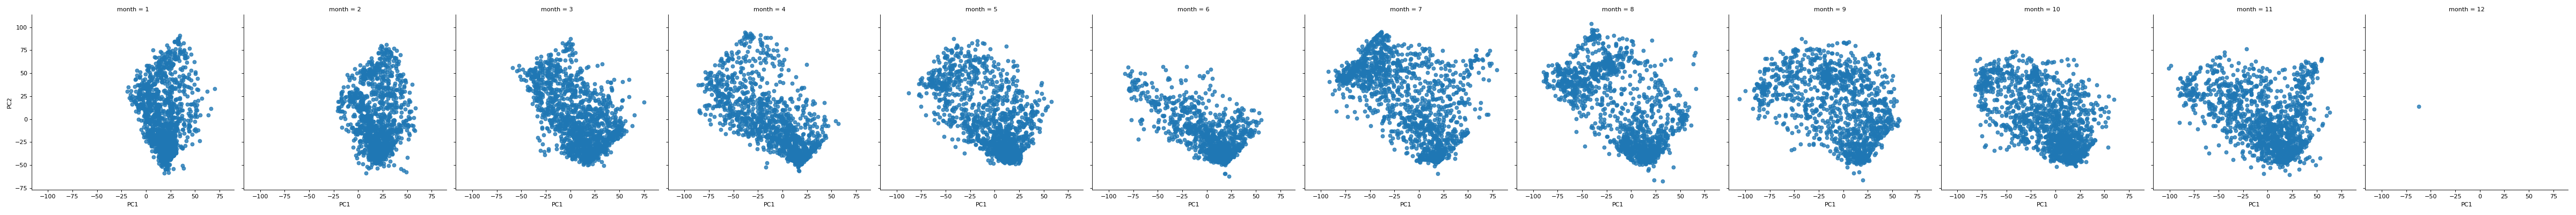

In [39]:
C1=np.dot(df,PC1)
C2=np.dot(df,PC2)
C3=np.dot(df,PC3)

PCA=pd.DataFrame({"PC1":C1,"PC2":C2,"PC3":C3},index=df.index)
PCA["gen"]=PCA.index
PCA["month"]=np.array(np.array(PCA.index.month))
PCA["day"]=np.array(np.array(PCA.index.day))

import seaborn as sns

# PCA1 Vs PC2
#sns.lmplot(data=PCA,x="PC1",y="PC2",hue="gen",fit_reg=False)
import matplotlib.pyplot as plt
#fig, ax = plt.subplots()
sns.lmplot(data=PCA,x="PC1",y="PC2",col="month",fit_reg=False)


# PCA1 VC PC3
#sns.lmplot(data=PCA,x="PC1",y="PC3",hue="gen",fit_reg=False)
#sns.lmplot(data=PCA,x="PC1",y="PC3",hue="season",fit_reg=False)

# Looking at timeseries underneath
#df[["SNOWNTH1","HDWF3","CLEMGPWF","LKBONNY2"]].plot()

# Analysisng within the month

<IPython.core.display.Javascript object>


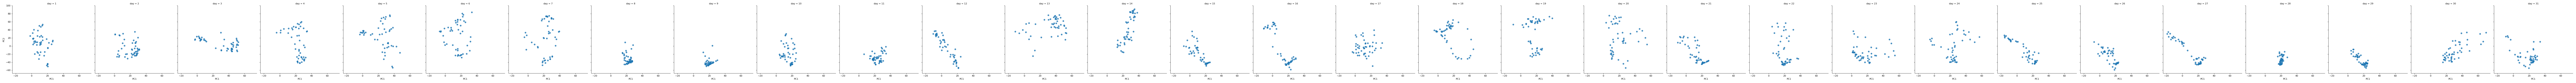

In [37]:
C1=np.dot(df,PC1)
C2=np.dot(df,PC2)
C3=np.dot(df,PC3)



PCA=pd.DataFrame({"PC1":C1,"PC2":C2,"PC3":C3},index=df.index)
PCA["gen"]=PCA.index
PCA["season"]=np.array(np.array(PCA.index.month))
PCA["day"]=np.array(np.array(PCA.index.day))

import seaborn as sns

# PCA1 Vs PC2
#sns.lmplot(data=PCA,x="PC1",y="PC2",hue="gen",fit_reg=False)
import matplotlib.pyplot as plt
#fig, ax = plt.subplots()
sns.lmplot(data=PCA[PCA["season"]==1],x="PC1",y="PC2",col="day",fit_reg=False)


# PCA1 VC PC3
#sns.lmplot(data=PCA,x="PC1",y="PC3",hue="gen",fit_reg=False)
#sns.lmplot(data=PCA,x="PC1",y="PC3",hue="season",fit_reg=False)

# Looking at timeseries underneath
#df[["SNOWNTH1","HDWF3","CLEMGPWF","LKBONNY2"]].plot()

In [29]:
PCA[PCA.index.month==1].mean(axis=0)

PC1       18.426783
PC2       -4.108202
PC3      -11.100788
season     1.000000
dtype: float64

In [30]:
PCA[PCA.index.month==6].mean(axis=0)

PC1        6.219634
PC2      -24.407564
PC3       -6.028712
season     6.000000
dtype: float64

In [22]:
df.columns

Index([u'HALLWF1', u'SNOWNTH1', u'HALLWF2', u'WATERLWF', u'BLUFF1',
       u'LKBONNY3', u'LKBONNY2', u'NBHWF1', u'CLEMGPWF', u'HDWF1', u'SNOWTWN1',
       u'HDWF2', u'HDWF3', u'SNOWSTH1'],
      dtype='object')

In [21]:
PC1

array([ 0.25149876, -0.05738577,  0.18889909, -0.20577457,  0.14331925,
       -0.11876175,  0.31539214, -0.09898018,  0.19801862, -0.34635482,
        0.05397271, -0.7410304 , -0.00370057, -0.01700981])

# Key thing now go back to the timeseries.

In [18]:
# Have we calculated correlation correctly? I suspect we did not subtract the mean

In [25]:
import scipy

scipy.stats.pearsonr(df["HALLWF1"],df["SNOWNTH1"])

(0.5747199002701741, 1.9942200552305014e-39)